<a href="https://colab.research.google.com/github/zameerhossain/Speech-recognition/blob/master/Sentiment_classification_using_Specch_recognition%20(%20Feature%20Extraction%3ASpectral%20Rolloff).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wave

  Created wheel for wave: filename=Wave-0.0.2-cp36-none-any.whl size=1246 sha256=38942dbffb34f98d62096c34936abe42e1be82a15d7f49c74ffbf505c46244eb
  Stored in directory: /root/.cache/pip/wheels/8c/2e/ad/d96151afb1fdccf126346b26eabb91fec3c5ce5cbee7287fbf
Successfully built wave


In [2]:
!sudo apt-get install python-pyaudio

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-cufft-10-1 cuda-cufft-dev-10-1 cuda-curand-10-1 cuda-curand-dev-10-1
  cuda-cusolver-10-1 cuda-cusolver-dev-10-1 cuda-cusparse-10-1
  cuda-cusparse-dev-10-1 cuda-license-10-2 cuda-npp-10-1 cuda-npp-dev-10-1
  cuda-nsight-10-1 cuda-nsight-compute-10-1 cuda-nsight-systems-10-1
  cuda-nvgraph-10-1 cuda-nvgraph-dev-10-1 cuda-nvjpeg-10-1
  cuda-nvjpeg-dev-10-1 cuda-nvrtc-10-1 cuda-nvrtc-dev-10-1 cuda-nvvp-10-1
  libcublas10 libnvidia-common-430 nsight-compute-2019.5.0
  nsight-systems-2019.5.2
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libportaudio2
Suggested packages:
  python-pyaudio-doc
The following NEW packages will be installed:
  libportaudio2 python-pyaudio
0 upgraded, 2 newly installed, 0 to remove and 5 not upgraded.
Need to get 88.6 kB of archives

In [3]:
import os
import random
import sys


## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf
py.init_notebook_mode(connected=True)


## Keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical


## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

input_duration=3


Using TensorFlow backend.


In [4]:
!wget clone https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1

--2019-12-07 14:12:41--  http://clone/
Resolving clone (clone)... failed: Name or service not known.
wget: unable to resolve host address ‘clone’
--2019-12-07 14:12:41--  https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.95.95
Connecting to zenodo.org (zenodo.org)|188.184.95.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208468073 (199M) [application/octet-stream]
Saving to: ‘Audio_Speech_Actors_01-24.zip?download=1’

Audio_Speech_Actors 100%[===================>] 198.81M   126MB/s    in 1.6s    

2019-12-07 14:12:43 (126 MB/s) - ‘Audio_Speech_Actors_01-24.zip?download=1’ saved [208468073/208468073]

FINISHED --2019-12-07 14:12:43--
Total wall clock time: 2.1s
Downloaded: 1 files, 199M in 1.6s (126 MB/s)


In [0]:
!mv /content/Audio_Speech_Actors_01-24.zip?download=1 /content/datasets

In [6]:
!unzip /content/datasets/Audio_Speech_Actors_01-24.zip?download=1 -d /content/datasets

Archive:  /content/datasets/Audio_Speech_Actors_01-24.zip?download=1
   creating: /content/datasets/Actor_01/
  inflating: /content/datasets/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: /content/datasets/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: /content/datasets/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: /content/datasets/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: /content/datasets/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: /conte

In [0]:
!mv /content/datasets/Audio_Speech_Actors_01-24.zip?download=1 /content

In [8]:
dir_list = os.listdir('/content/datasets')
dir_list.sort()
print (dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [0]:
data_df = pd.DataFrame(columns=['path', 'source', 'actor', 'gender',
                                'intensity', 'statement', 'repetition', 'emotion'])
count = 0
for i in dir_list:
    file_list = os.listdir('/content/datasets/' + i)
    for f in file_list:
        nm = f.split('.')[0].split('-')
        path = '/content/datasets/' + i + '/' + f
        src = int(nm[1])
        actor = int(nm[-1])
        emotion = int(nm[2])
        
        if int(actor)%2 == 0:
            gender = "female"
        else:
            gender = "male"
        
        if nm[3] == '01':
            intensity = 0
        else:
            intensity = 1
        
        if nm[4] == '01':
            statement = 0
        else:
            statement = 1
        
        if nm[5] == '01':
            repeat = 0
        else:
            repeat = 1
            
        data_df.loc[count] = [path, src, actor, gender, intensity, statement, repeat, emotion]
        count += 1

In [10]:
print (len(data_df))
data_df



1440


path  ... emotion
0     /content/datasets/Actor_01/03-01-06-01-01-01-0...  ...       6
1     /content/datasets/Actor_01/03-01-04-02-01-01-0...  ...       4
2     /content/datasets/Actor_01/03-01-05-02-01-02-0...  ...       5
3     /content/datasets/Actor_01/03-01-06-02-01-01-0...  ...       6
4     /content/datasets/Actor_01/03-01-07-01-02-01-0...  ...       7
...                                                 ...  ...     ...
1435  /content/datasets/Actor_24/03-01-08-01-01-02-2...  ...       8
1436  /content/datasets/Actor_24/03-01-03-02-01-01-2...  ...       3
1437  /content/datasets/Actor_24/03-01-02-01-02-02-2...  ...       2
1438  /content/datasets/Actor_24/03-01-02-01-02-01-2...  ...       2
1439  /content/datasets/Actor_24/03-01-05-01-02-02-2...  ...       5

[1440 rows x 8 columns]

In [11]:
!apt-get install libmagic-dev
!pip install python-magic
!pip install pydub
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install pyAudioAnalysis
!pip install eyed3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-cufft-10-1 cuda-cufft-dev-10-1 cuda-curand-10-1 cuda-curand-dev-10-1
  cuda-cusolver-10-1 cuda-cusolver-dev-10-1 cuda-cusparse-10-1
  cuda-cusparse-dev-10-1 cuda-license-10-2 cuda-npp-10-1 cuda-npp-dev-10-1
  cuda-nsight-10-1 cuda-nsight-compute-10-1 cuda-nsight-systems-10-1
  cuda-nvgraph-10-1 cuda-nvgraph-dev-10-1 cuda-nvjpeg-10-1
  cuda-nvjpeg-dev-10-1 cuda-nvrtc-10-1 cuda-nvrtc-dev-10-1 cuda-nvvp-10-1
  libcublas10 libnvidia-common-430 nsight-compute-2019.5.0
  nsight-systems-2019.5.2
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libmagic-mgc libmagic1
Suggested packages:
  file
The following NEW packages will be installed:
  libmagic-dev libmagic-mgc libmagic1
0 upgraded, 3 newly installed, 0 to remove and 5 not upgraded.
Need to get 332 kB of archives.
Af

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import audioFeatureExtraction
import matplotlib.pyplot as plt
import os

In [30]:
filename = data_df.path[1400]
print (filename)

samples, sample_rate = librosa.load(filename)
sample_rate, samples

/content/datasets/Actor_24/03-01-08-01-02-01-24.wav


(22050, array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -5.9672811e-06,  3.4225222e-06,  0.0000000e+00], dtype=float32))

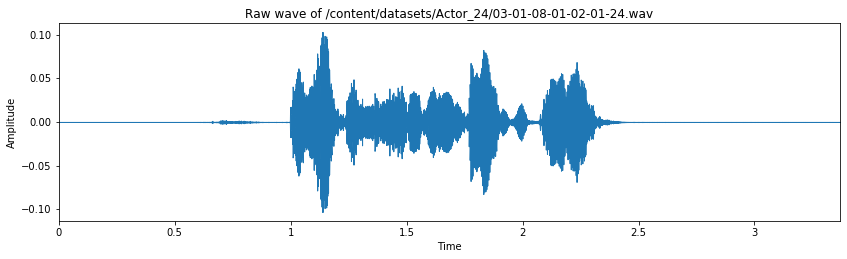

In [31]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)



In [0]:
aa , bb = librosa.effects.trim(samples, top_db=30)


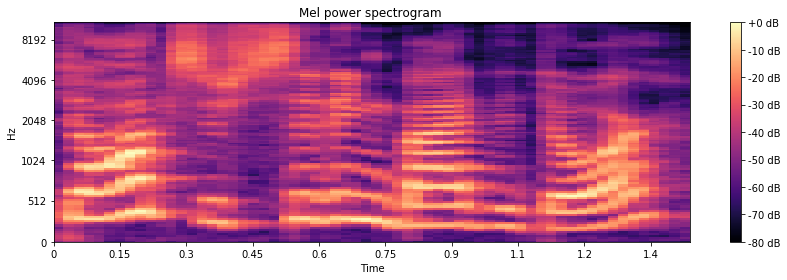

In [33]:
S = librosa.feature.melspectrogram(aa, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

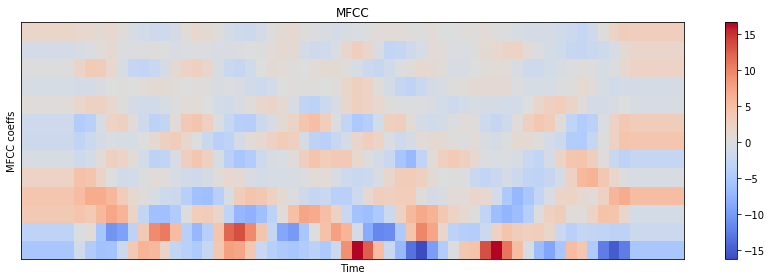

In [34]:

mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

delta2_mfcc = librosa.feature.delta(mfcc, order=2)
plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [35]:
data_df.emotion


0       6
1       4
2       5
3       6
4       7
       ..
1435    8
1436    3
1437    2
1438    2
1439    5
Name: emotion, Length: 1440, dtype: object

In [0]:
label8_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1:
        lb = "_neutral"
    elif data_df.emotion[i] == 2:
        lb = "_calm"
    elif data_df.emotion[i] == 3:
        lb = "_happy"
    elif data_df.emotion[i] == 4:
        lb = "_sad"
    elif data_df.emotion[i] == 5:
        lb = "_angry"
    elif data_df.emotion[i] == 6:
        lb = "_fearful"
    elif data_df.emotion[i] == 7:
        lb = "_disgust"
    elif data_df.emotion[i] == 8:
        lb = "_surprised"
    else:
        lb = "_none"
        

    # Add gender to the label 
    label8_list.append(data_df.gender[i]  + lb)
    


In [0]:
def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
    tmp_df = pd.DataFrame()
    tmp_df['Emotion'] = list(dist.keys())
    tmp_df['Count'] = list(dist)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.barplot(x="Emotion", y='Count', color=color_code, data=tmp_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

path  ...             label
0     /content/datasets/Actor_01/03-01-06-01-01-01-0...  ...      male_fearful
1     /content/datasets/Actor_01/03-01-04-02-01-01-0...  ...          male_sad
2     /content/datasets/Actor_01/03-01-05-02-01-02-0...  ...        male_angry
3     /content/datasets/Actor_01/03-01-06-02-01-01-0...  ...      male_fearful
4     /content/datasets/Actor_01/03-01-07-01-02-01-0...  ...      male_disgust
...                                                 ...  ...               ...
1435  /content/datasets/Actor_24/03-01-08-01-01-02-2...  ...  female_surprised
1436  /content/datasets/Actor_24/03-01-03-02-01-01-2...  ...      female_happy
1437  /content/datasets/Actor_24/03-01-02-01-02-02-2...  ...       female_calm
1438  /content/datasets/Actor_24/03-01-02-01-02-01-2...  ...       female_calm
1439  /content/datasets/Actor_24/03-01-05-01-02-02-2...  ...      female_angry

[1440 rows x 9 columns]

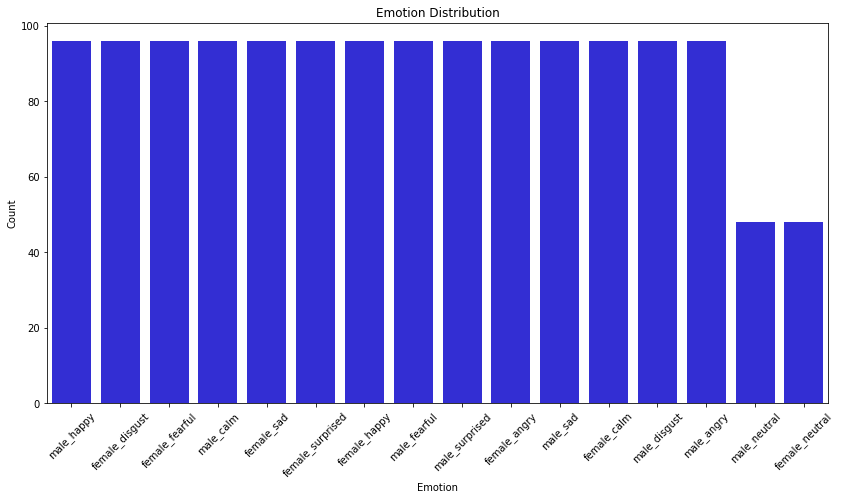

In [38]:
data_df['label'] = label8_list
a = data_df.label.value_counts()
plot_emotion_dist(a, "#1913ee", "Emotion Distribution")
data_df

In [0]:
label9_list = []
for i in range(len(data_df)):
    if data_df.label[i] == "male_neutral":
        lb1 = 0
    elif data_df.label[i] == "male_calm":
        lb1 = 1
    elif data_df.label[i] == "male_happy":
        lb1 = 2
    elif data_df.label[i] == "male_sad":
        lb1 = 3
    elif data_df.label[i] == "male_angry":
        lb1 = 4
    elif data_df.label[i] == "male_fearful":
        lb1 = 5
    elif data_df.label[i] == "male_disgust":
        lb1 = 6
    elif data_df.label[i] == "male_surprised":
        lb1 = 7
    elif data_df.label[i] == "female_neutral":
        lb1 = 8
    elif data_df.label[i] == "female_calm":
        lb1 = 9
    elif data_df.label[i] == "female_happy":
        lb1 = 10
    elif data_df.label[i] == "female_sad":
        lb1 = 11
    elif data_df.label[i] == "female_angry":
        lb1 = 12
    elif data_df.label[i] == "female_fearful":
        lb1 = 13
    elif data_df.label[i] == "female_disgust":
        lb1 = 14
    elif data_df.label[i] == "female_surprised":
        lb1 = 15    
    else:
        lb1 = "_none"
        

    # Add gender to the label 
    label9_list.append(lb1)

path  ... class1
0     /content/datasets/Actor_01/03-01-06-01-01-01-0...  ...      5
1     /content/datasets/Actor_01/03-01-04-02-01-01-0...  ...      3
2     /content/datasets/Actor_01/03-01-05-02-01-02-0...  ...      4
3     /content/datasets/Actor_01/03-01-06-02-01-01-0...  ...      5
4     /content/datasets/Actor_01/03-01-07-01-02-01-0...  ...      6
...                                                 ...  ...    ...
1435  /content/datasets/Actor_24/03-01-08-01-01-02-2...  ...     15
1436  /content/datasets/Actor_24/03-01-03-02-01-01-2...  ...     10
1437  /content/datasets/Actor_24/03-01-02-01-02-02-2...  ...      9
1438  /content/datasets/Actor_24/03-01-02-01-02-01-2...  ...      9
1439  /content/datasets/Actor_24/03-01-05-01-02-02-2...  ...     12

[1440 rows x 10 columns]

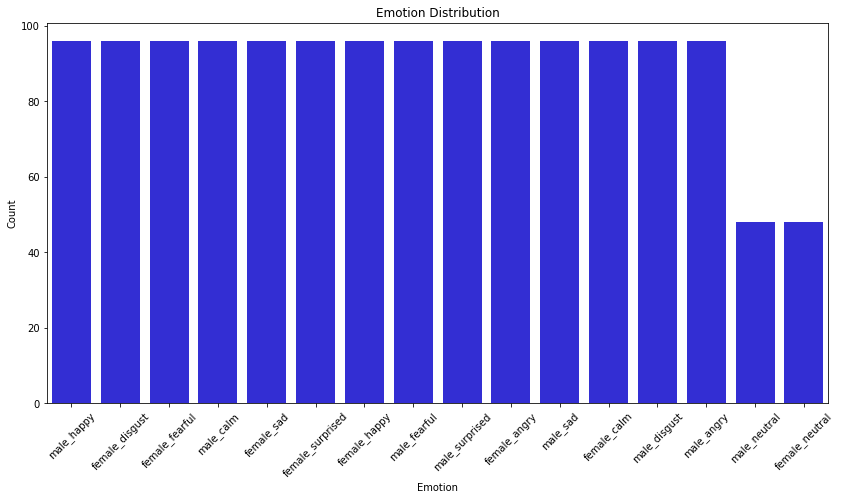

In [40]:
data_df['class1'] = label9_list
a = data_df.label.value_counts()
plot_emotion_dist(a, "#1913ee", "Emotion Distribution")
data_df

In [95]:
data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.spectral_rolloff(y=X, sr=sample_rate), axis=0)
    feature = mfccs
    data.loc[i] = [(feature/1000)]
    

100%|██████████| 1440/1440 [06:31<00:00,  3.71it/s]


In [96]:
data

feature
0     [8.290283203125, 11.304931640625, 12.123193359...
1     [16.386767578125, 16.19296875, 15.697705078125...
2     [12.70458984375, 12.726123046875, 12.661523437...
3     [7.170556640625, 7.256689453125, 7.42895507812...
4     [16.14990234375, 16.1068359375, 15.97763671875...
...                                                 ...
1435  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.5349121...
1436  [0.0, 0.0, 0.0, 15.89150390625, 15.8484375, 15...
1437  [12.812255859375, 12.812255859375, 12.98452148...
1438  [15.869970703125, 15.568505859375, 15.24550781...
1439  [9.711474609375, 10.20673828125, 10.4436035156...

[1440 rows x 1 columns]

In [97]:
data

feature
0     [8.290283203125, 11.304931640625, 12.123193359...
1     [16.386767578125, 16.19296875, 15.697705078125...
2     [12.70458984375, 12.726123046875, 12.661523437...
3     [7.170556640625, 7.256689453125, 7.42895507812...
4     [16.14990234375, 16.1068359375, 15.97763671875...
...                                                 ...
1435  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.5349121...
1436  [0.0, 0.0, 0.0, 15.89150390625, 15.8484375, 15...
1437  [12.812255859375, 12.812255859375, 12.98452148...
1438  [15.869970703125, 15.568505859375, 15.24550781...
1439  [9.711474609375, 10.20673828125, 10.4436035156...

[1440 rows x 1 columns]

In [0]:
datatest = pd.DataFrame(data['feature'].values.tolist())
labels1 = data_df.label
datatest = pd.concat([datatest,labels1], axis=1)
datatest = datatest.fillna(0)

In [99]:
datatest

0          1          2  ...        257        258             label
0      8.290283  11.304932  12.123193  ...  15.310107  15.805371      male_fearful
1     16.386768  16.192969  15.697705  ...  16.257568  16.279102          male_sad
2     12.704590  12.726123  12.661523  ...  11.757129  11.821729        male_angry
3      7.170557   7.256689   7.428955  ...   3.639111   3.617578      male_fearful
4     16.149902  16.106836  15.977637  ...   3.445312   3.423779      male_disgust
...         ...        ...        ...  ...        ...        ...               ...
1435   0.000000   0.000000   0.000000  ...   0.000000   0.000000  female_surprised
1436   0.000000   0.000000   0.000000  ...  14.642578  15.374707      female_happy
1437  12.812256  12.812256  12.984521  ...  15.073242  15.030176       female_calm
1438  15.869971  15.568506  15.245508  ...  14.836377  14.254980       female_calm
1439   9.711475  10.206738  10.443604  ...  14.061182  14.211914      female_angry

[1440 rows x 260 columns]

In [100]:
df3 = pd.DataFrame(data['feature'].values.tolist())
labels = data_df.label
df3.head()
newdf = pd.concat([df3,labels], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})
rnewdf.isnull().sum().sum()
rnewdf = rnewdf.fillna(0)
rnewdf.head()

0          1          2  ...        257        258         label
0   8.290283  11.304932  12.123193  ...  15.310107  15.805371  male_fearful
1  16.386768  16.192969  15.697705  ...  16.257568  16.279102      male_sad
2  12.704590  12.726123  12.661523  ...  11.757129  11.821729    male_angry
3   7.170557   7.256689   7.428955  ...   3.639111   3.617578  male_fearful
4  16.149902  16.106836  15.977637  ...   3.445312   3.423779  male_disgust

[5 rows x 260 columns]

In [0]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()


def noise(data):
    """
    Adding White Noise.
    """
    
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)
    
def stretch(data, rate=0.8):
    """
    Streching the Sound.
    """
    data = librosa.effects.time_stretch(data, rate)
    return data
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=1.5,high=3)
    return (data * dyn_change)
    
def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.0  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

In [102]:
data_df

path  ... class1
0     /content/datasets/Actor_01/03-01-06-01-01-01-0...  ...      5
1     /content/datasets/Actor_01/03-01-04-02-01-01-0...  ...      3
2     /content/datasets/Actor_01/03-01-05-02-01-02-0...  ...      4
3     /content/datasets/Actor_01/03-01-06-02-01-01-0...  ...      5
4     /content/datasets/Actor_01/03-01-07-01-02-01-0...  ...      6
...                                                 ...  ...    ...
1435  /content/datasets/Actor_24/03-01-08-01-01-02-2...  ...     15
1436  /content/datasets/Actor_24/03-01-03-02-01-01-2...  ...     10
1437  /content/datasets/Actor_24/03-01-02-01-02-02-2...  ...      9
1438  /content/datasets/Actor_24/03-01-02-01-02-01-2...  ...      9
1439  /content/datasets/Actor_24/03-01-05-01-02-02-2...  ...     12

[1440 rows x 10 columns]

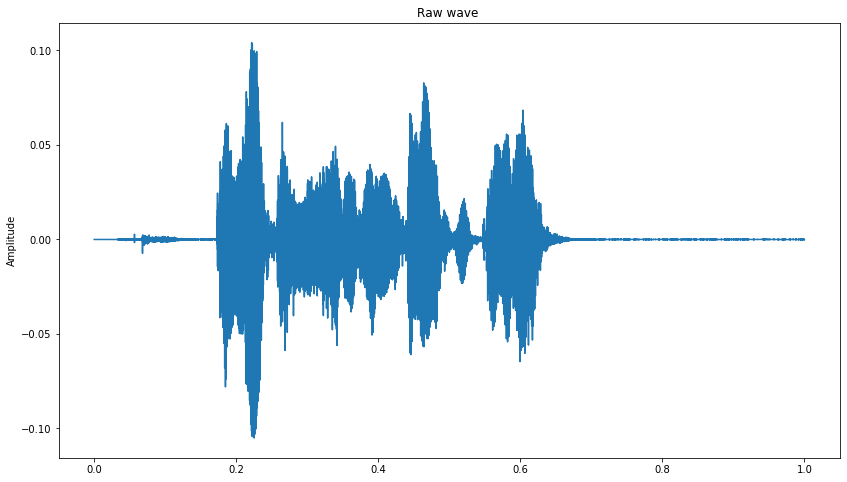

In [103]:
X, sample_rate = librosa.load(data_df.path[1400], res_type='kaiser_fast',duration=4,sr=22050*2,offset=0.5)
plot_time_series(X)
ipd.Audio(X, rate=sample_rate)

In [104]:
syn_data1 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data_df.label[i]:
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.spectral_rolloff(y=X, sr=sample_rate), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data1.loc[i] = [feature/1000, data_df.label[i]]

100%|██████████| 1440/1440 [06:46<00:00,  3.55it/s]


In [105]:
syn_data2 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data_df.label[i]:
        X = pitch(X, sample_rate)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.spectral_rolloff(y=X, sr=sample_rate), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data2.loc[i] = [feature/1000, data_df.label[i]]

100%|██████████| 1440/1440 [12:00<00:00,  1.97it/s]


In [106]:
syn_data2


feature             label
0     [8.807080078125, 11.2833984375, 11.49873046875...      male_fearful
1     [16.645166015625, 16.365234375, 15.676171875, ...          male_sad
2     [14.491845703125, 14.405712890625, 14.40571289...        male_angry
3     [7.859619140625, 8.031884765625, 8.05341796875...      male_fearful
4     [17.032763671875, 17.18349609375, 17.441894531...      male_disgust
...                                                 ...               ...
1435  [0.0, 0.0, 0.0, 17.44189453125, 17.59262695312...  female_surprised
1436  [17.44189453125, 16.860498046875, 17.248095703...      female_happy
1437  [14.12578125, 14.319580078125, 14.08271484375,...       female_calm
1438  [17.678759765625, 17.334228515625, 17.24809570...       female_calm
1439  [10.5943359375, 10.917333984375, 10.8312011718...      female_angry

[1440 rows x 2 columns]

In [0]:
syn_data1 = syn_data1.reset_index(drop=True)
syn_data2 = syn_data2.reset_index(drop=True)

In [0]:
datate=data.reset_index(drop=True)

In [109]:
df4 = pd.DataFrame(syn_data1['feature'].values.tolist())
labels4 = syn_data1.label
syndf1 = pd.concat([df4,labels4], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "class1"})
syndf1 = syndf1.fillna(259)
(syndf1)

0          1          2  ...         257         258             label
0     17.721826  18.238623  18.432422  ...   18.324756   18.798486      male_fearful
1     18.238623  18.410889  18.604688  ...   18.453955   18.475488          male_sad
2     15.396240  15.482373  15.719238  ...   18.798486   18.733887        male_angry
3     18.755420  18.841553  18.863086  ...    4.780371    4.392773      male_fearful
4     18.776953  18.970752  18.863086  ...   16.408301   16.494434      male_disgust
...         ...        ...        ...  ...         ...         ...               ...
1435  18.690820  18.647754  18.690820  ...  259.000000  259.000000  female_surprised
1436  18.453955  18.367822  18.776953  ...   18.518555   18.798486      female_happy
1437  18.733887  18.755420  18.690820  ...   18.820020   18.863086       female_calm
1438  18.863086  18.884619  18.561621  ...   18.410889   18.174023       female_calm
1439  17.700293  17.614160  17.484961  ...   18.540088   18.497021      female_angry

[1440 rows x 260 columns]

In [110]:
df4 = pd.DataFrame(syn_data2['feature'].values.tolist())
labels4 = syn_data2.label
syndf2 = pd.concat([df4,labels4], axis=1)
syndf2 = syndf2.rename(index=str, columns={"0": "class1"})
syndf2 = syndf2.fillna(0)
syndf2

0          1          2  ...        257        258             label
0      8.807080  11.283398  11.498730  ...  15.848437  15.848437      male_fearful
1     16.645166  16.365234  15.676172  ...  16.279102  16.408301          male_sad
2     14.491846  14.405713  14.405713  ...  13.178320  12.919922        male_angry
3      7.859619   8.031885   8.053418  ...   4.995703   4.694238      male_fearful
4     17.032764  17.183496  17.441895  ...   4.306641   4.263574      male_disgust
...         ...        ...        ...  ...        ...        ...               ...
1435   0.000000   0.000000   0.000000  ...   0.000000   0.000000  female_surprised
1436  17.441895  16.860498  17.248096  ...  16.149902  15.891504      female_happy
1437  14.125781  14.319580  14.082715  ...  16.343701  16.688232       female_calm
1438  17.678760  17.334229  17.248096  ...  16.429834  16.300635       female_calm
1439  10.594336  10.917334  10.831201  ...  15.374707  15.525439      female_angry

[1440 rows x 260 columns]

In [111]:
combined_df = pd.concat([rnewdf, syndf1, syndf2], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.head()

0          1          2  ...        257        258         label
0   8.290283  11.304932  12.123193  ...  15.310107  15.805371  male_fearful
1  16.386768  16.192969  15.697705  ...  16.257568  16.279102      male_sad
2  12.704590  12.726123  12.661523  ...  11.757129  11.821729    male_angry
3   7.170557   7.256689   7.428955  ...   3.639111   3.617578  male_fearful
4  16.149902  16.106836  15.977637  ...   3.445312   3.423779  male_disgust

[5 rows x 260 columns]

In [0]:
#combined_df=datatest

In [113]:
combined_df

0          1          2  ...        257        258             label
0      8.290283  11.304932  12.123193  ...  15.310107  15.805371      male_fearful
1     16.386768  16.192969  15.697705  ...  16.257568  16.279102          male_sad
2     12.704590  12.726123  12.661523  ...  11.757129  11.821729        male_angry
3      7.170557   7.256689   7.428955  ...   3.639111   3.617578      male_fearful
4     16.149902  16.106836  15.977637  ...   3.445312   3.423779      male_disgust
...         ...        ...        ...  ...        ...        ...               ...
4315   0.000000   0.000000   0.000000  ...   0.000000   0.000000  female_surprised
4316  17.441895  16.860498  17.248096  ...  16.149902  15.891504      female_happy
4317  14.125781  14.319580  14.082715  ...  16.343701  16.688232       female_calm
4318  17.678760  17.334229  17.248096  ...  16.429834  16.300635       female_calm
4319  10.594336  10.917334  10.831201  ...  15.374707  15.525439      female_angry

[4320 rows x 260 columns]

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
X = combined_df.drop(['label'], axis=1)
y = combined_df.label

#X = combined_df.drop(['label'], axis=1)
#y = combined_df.label


X, X_f_test, y, y_f_test = train_test_split(X, y, test_size=0.10)
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [0]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_f_test=np.array(X_f_test)
y_f_test=np.array(y_f_test)
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [116]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [117]:
print(len(X_train))
print(len(y_train))
print(len(y_test))
print(len(X_test))
print(len(X_f_test))
print(len(y_f_test))

3110
3110
778
778
432
432


In [118]:
data_df


path  ... class1
0     /content/datasets/Actor_01/03-01-06-01-01-01-0...  ...      5
1     /content/datasets/Actor_01/03-01-04-02-01-01-0...  ...      3
2     /content/datasets/Actor_01/03-01-05-02-01-02-0...  ...      4
3     /content/datasets/Actor_01/03-01-06-02-01-01-0...  ...      5
4     /content/datasets/Actor_01/03-01-07-01-02-01-0...  ...      6
...                                                 ...  ...    ...
1435  /content/datasets/Actor_24/03-01-08-01-01-02-2...  ...     15
1436  /content/datasets/Actor_24/03-01-03-02-01-01-2...  ...     10
1437  /content/datasets/Actor_24/03-01-02-01-02-02-2...  ...      9
1438  /content/datasets/Actor_24/03-01-02-01-02-01-2...  ...      9
1439  /content/datasets/Actor_24/03-01-05-01-02-02-2...  ...     12

[1440 rows x 10 columns]

In [119]:
X_train

array([[15.24550781, 15.33164063, 15.159375  , ..., 15.78383789,
        16.06376953, 15.8699707 ],
       [18.66928711, 18.64775391, 18.56162109, ..., 18.41088867,
        18.47548828, 18.41088867],
       [17.98022461, 18.06635742, 17.70029297, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [10.57280273, 10.74506836, 10.01293945, ..., 14.16884766,
        11.75712891, 11.62792969],
       [ 0.        , 18.38935547, 17.29116211, ..., 15.91303711,
        15.33164063, 14.94404297],
       [13.91044922, 14.12578125, 11.7355957 , ...,  2.90698242,
         6.71835938, 11.11113281]])

In [120]:
X_train.shape

(3110, 259)

In [0]:


x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [0]:
from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [123]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D ,BatchNormalization
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
from keras import regularizers
model = Sequential()
model.add(Conv1D(64, 8, padding='same',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(256, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(512, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(512, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(512, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
# Edit according to target class no.
model.add(Dense(16))
model.add(Activation('softmax'))
opt = keras.optimizers.Adam(lr=0.0001)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', fscore])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 259, 64)           576       
_________________________________________________________________
activation_10 (Activation)   (None, 259, 64)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 259, 128)          65664     
_________________________________________________________________
batch_normalization_3 (Batch (None, 259, 128)          512       
_________________________________________________________________
activation_11 (Activation)   (None, 259, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 259, 128)          0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 32, 128)          

In [124]:
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20 ,min_lr=0.000001)
mcp_save = ModelCheckpoint('cnn_model', save_best_only=True, monitor='val_loss', mode='min')
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=80,
                     validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce])

Train on 3110 samples, validate on 778 samples
Epoch 1/80
3110/3110 [==============================] - 10s 3ms/step - loss: 2.6968 - acc: 0.1122 - fscore: 0.0018 - val_loss: 2.6254 - val_acc: 0.1388 - val_fscore: 0.0000e+00
Epoch 2/80
3110/3110 [==============================] - 8s 3ms/step - loss: 2.4453 - acc: 0.1910 - fscore: 0.0078 - val_loss: 2.6691 - val_acc: 0.1118 - val_fscore: 0.0000e+00
Epoch 3/80
3110/3110 [==============================] - 8s 3ms/step - loss: 2.2387 - acc: 0.2547 - fscore: 0.0352 - val_loss: 2.6142 - val_acc: 0.1427 - val_fscore: 0.0000e+00
Epoch 4/80
3110/3110 [==============================] - 8s 3ms/step - loss: 2.0676 - acc: 0.3164 - fscore: 0.1103 - val_loss: 2.6984 - val_acc: 0.1658 - val_fscore: 0.0097
Epoch 5/80
3110/3110 [==============================] - 8s 3ms/step - loss: 1.8752 - acc: 0.3788 - fscore: 0.1871 - val_loss: 2.8736 - val_acc: 0.1465 - val_fscore: 0.0660
Epoch 6/80
3110/3110 [==============================] - 8s 3ms/step - loss: 1.70

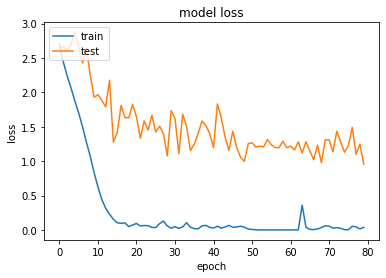

In [125]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [127]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("cnn_model")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 73.65%


In [0]:
lb = LabelEncoder()
test_valid_lb = np_utils.to_categorical(lb.fit_transform(y_f_test))
test_valid = np.expand_dims(X_f_test, axis=2)

In [129]:
preds = loaded_model.predict(test_valid, 
                         batch_size=16, 
                         verbose=1)

432/432 [==============================] - 1s 1ms/step


In [0]:

predictions = (lb.inverse_transform((preds.argmax(axis=1).astype(int).flatten())))


In [0]:

actualvalues = (lb.inverse_transform((test_valid_lb.argmax(axis=1).astype(int).flatten())))

In [132]:
from sklearn.metrics import classification_report
import numpy as np
print(classification_report(predictions, actualvalues))

                  precision    recall  f1-score   support

    female_angry       0.55      0.94      0.70        17
     female_calm       0.62      0.88      0.73        17
  female_disgust       0.65      0.83      0.73        24
  female_fearful       0.80      0.69      0.74        35
    female_happy       0.78      0.78      0.78        32
  female_neutral       1.00      0.71      0.83        24
      female_sad       0.67      0.75      0.71        24
female_surprised       0.56      0.88      0.68        16
      male_angry       0.61      0.61      0.61        23
       male_calm       0.68      0.83      0.75        23
    male_disgust       0.84      0.72      0.78        29
    male_fearful       0.89      0.44      0.59        57
      male_happy       0.69      0.54      0.60        41
    male_neutral       0.83      0.77      0.80        13
        male_sad       0.65      0.69      0.67        29
  male_surprised       0.63      0.86      0.73        28

        accu

In [133]:


preddf = pd.DataFrame({'predictedvalues': predictions})
actualdf = pd.DataFrame({'actualvalues': actualvalues})
finaldf = actualdf.join(preddf)
finaldf[50:70]


actualvalues   predictedvalues
50        male_happy        male_happy
51      female_happy    female_fearful
52    female_fearful    female_fearful
53    female_fearful      male_fearful
54        male_happy        male_happy
55  female_surprised        male_happy
56        female_sad      male_fearful
57    female_fearful      male_fearful
58    male_surprised         male_calm
59        female_sad        female_sad
60    female_fearful    female_fearful
61        male_happy        male_happy
62          male_sad    female_disgust
63  female_surprised  female_surprised
64    female_fearful    female_fearful
65         male_calm         male_calm
66       female_calm    female_neutral
67      female_angry         male_calm
68        male_happy        male_happy
69        male_happy        male_angry

In [134]:
finaldf.groupby('actualvalues').count()


predictedvalues
actualvalues                     
female_angry                   29
female_calm                    24
female_disgust                 31
female_fearful                 30
female_happy                   32
female_neutral                 17
female_sad                     27
female_surprised               25
male_angry                     23
male_calm                      28
male_disgust                   25
male_fearful                   28
male_happy                     32
male_neutral                   12
male_sad                       31
male_surprised                 38

In [135]:
finaldf.groupby('predictedvalues').count()

actualvalues
predictedvalues               
female_angry                17
female_calm                 17
female_disgust              24
female_fearful              35
female_happy                32
female_neutral              24
female_sad                  24
female_surprised            16
male_angry                  23
male_calm                   23
male_disgust                29
male_fearful                57
male_happy                  41
male_neutral                13
male_sad                    29
male_surprised              28

In [0]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)